In [1]:
!nvidia-smi

Tue Mar 12 13:58:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

To enable this option, you must change **Go to Runtime -> Change runtime type , and select “GPU” as the Hardware Accelerator**

## Install dependecy and test it

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 4.9 MB/s eta 0:00:00


In [5]:
!yolo predict model=yolov8n.pt source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

100% 6.23M/6.23M [00:00<00:00, 80.7MB/s]
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 53.5MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 131.9ms
Speed: 14.3ms preprocess, 131.9ms inference, 890.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Get datasets from your own Google drive

In [17]:
# You must download the dataset from release and import it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
%cd /content/drive/MyDrive/D-Fire-datasets/fire

/content/drive/MyDrive/D-Fire-datasets/fire


In [19]:
!ls

data.yaml  runs  test  train  valid  yolov8s.pt


In [20]:
!cat data.yaml

names:
- fire
- default
- smoke
nc: 3
roboflow:
  license: CC BY 4.0
  project: fire-wrpgm
  url: https://universe.roboflow.com/custom-thxhn/fire-wrpgm/dataset/8
  version: 8
  workspace: custom-thxhn
test: /content/drive/MyDrive/D-Fire-datasets/fire/test/images
train: /content/drive/MyDrive/D-Fire-datasets/fire/train/images
val: /content/drive/MyDrive/D-Fire-datasets/fire/valid/images


## Start training model with YoloV8 and index with data.yaml

In [23]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=416 plots=True

100% 21.5M/21.5M [00:00<00:00, 120MB/s] 
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

In [25]:
!ls ./runs/detect/train3

args.yaml					    PR_curve.png	train_batch826.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch827.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1710253818.839cceaf8ef0.9436.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch825.jpg


## Checking training results

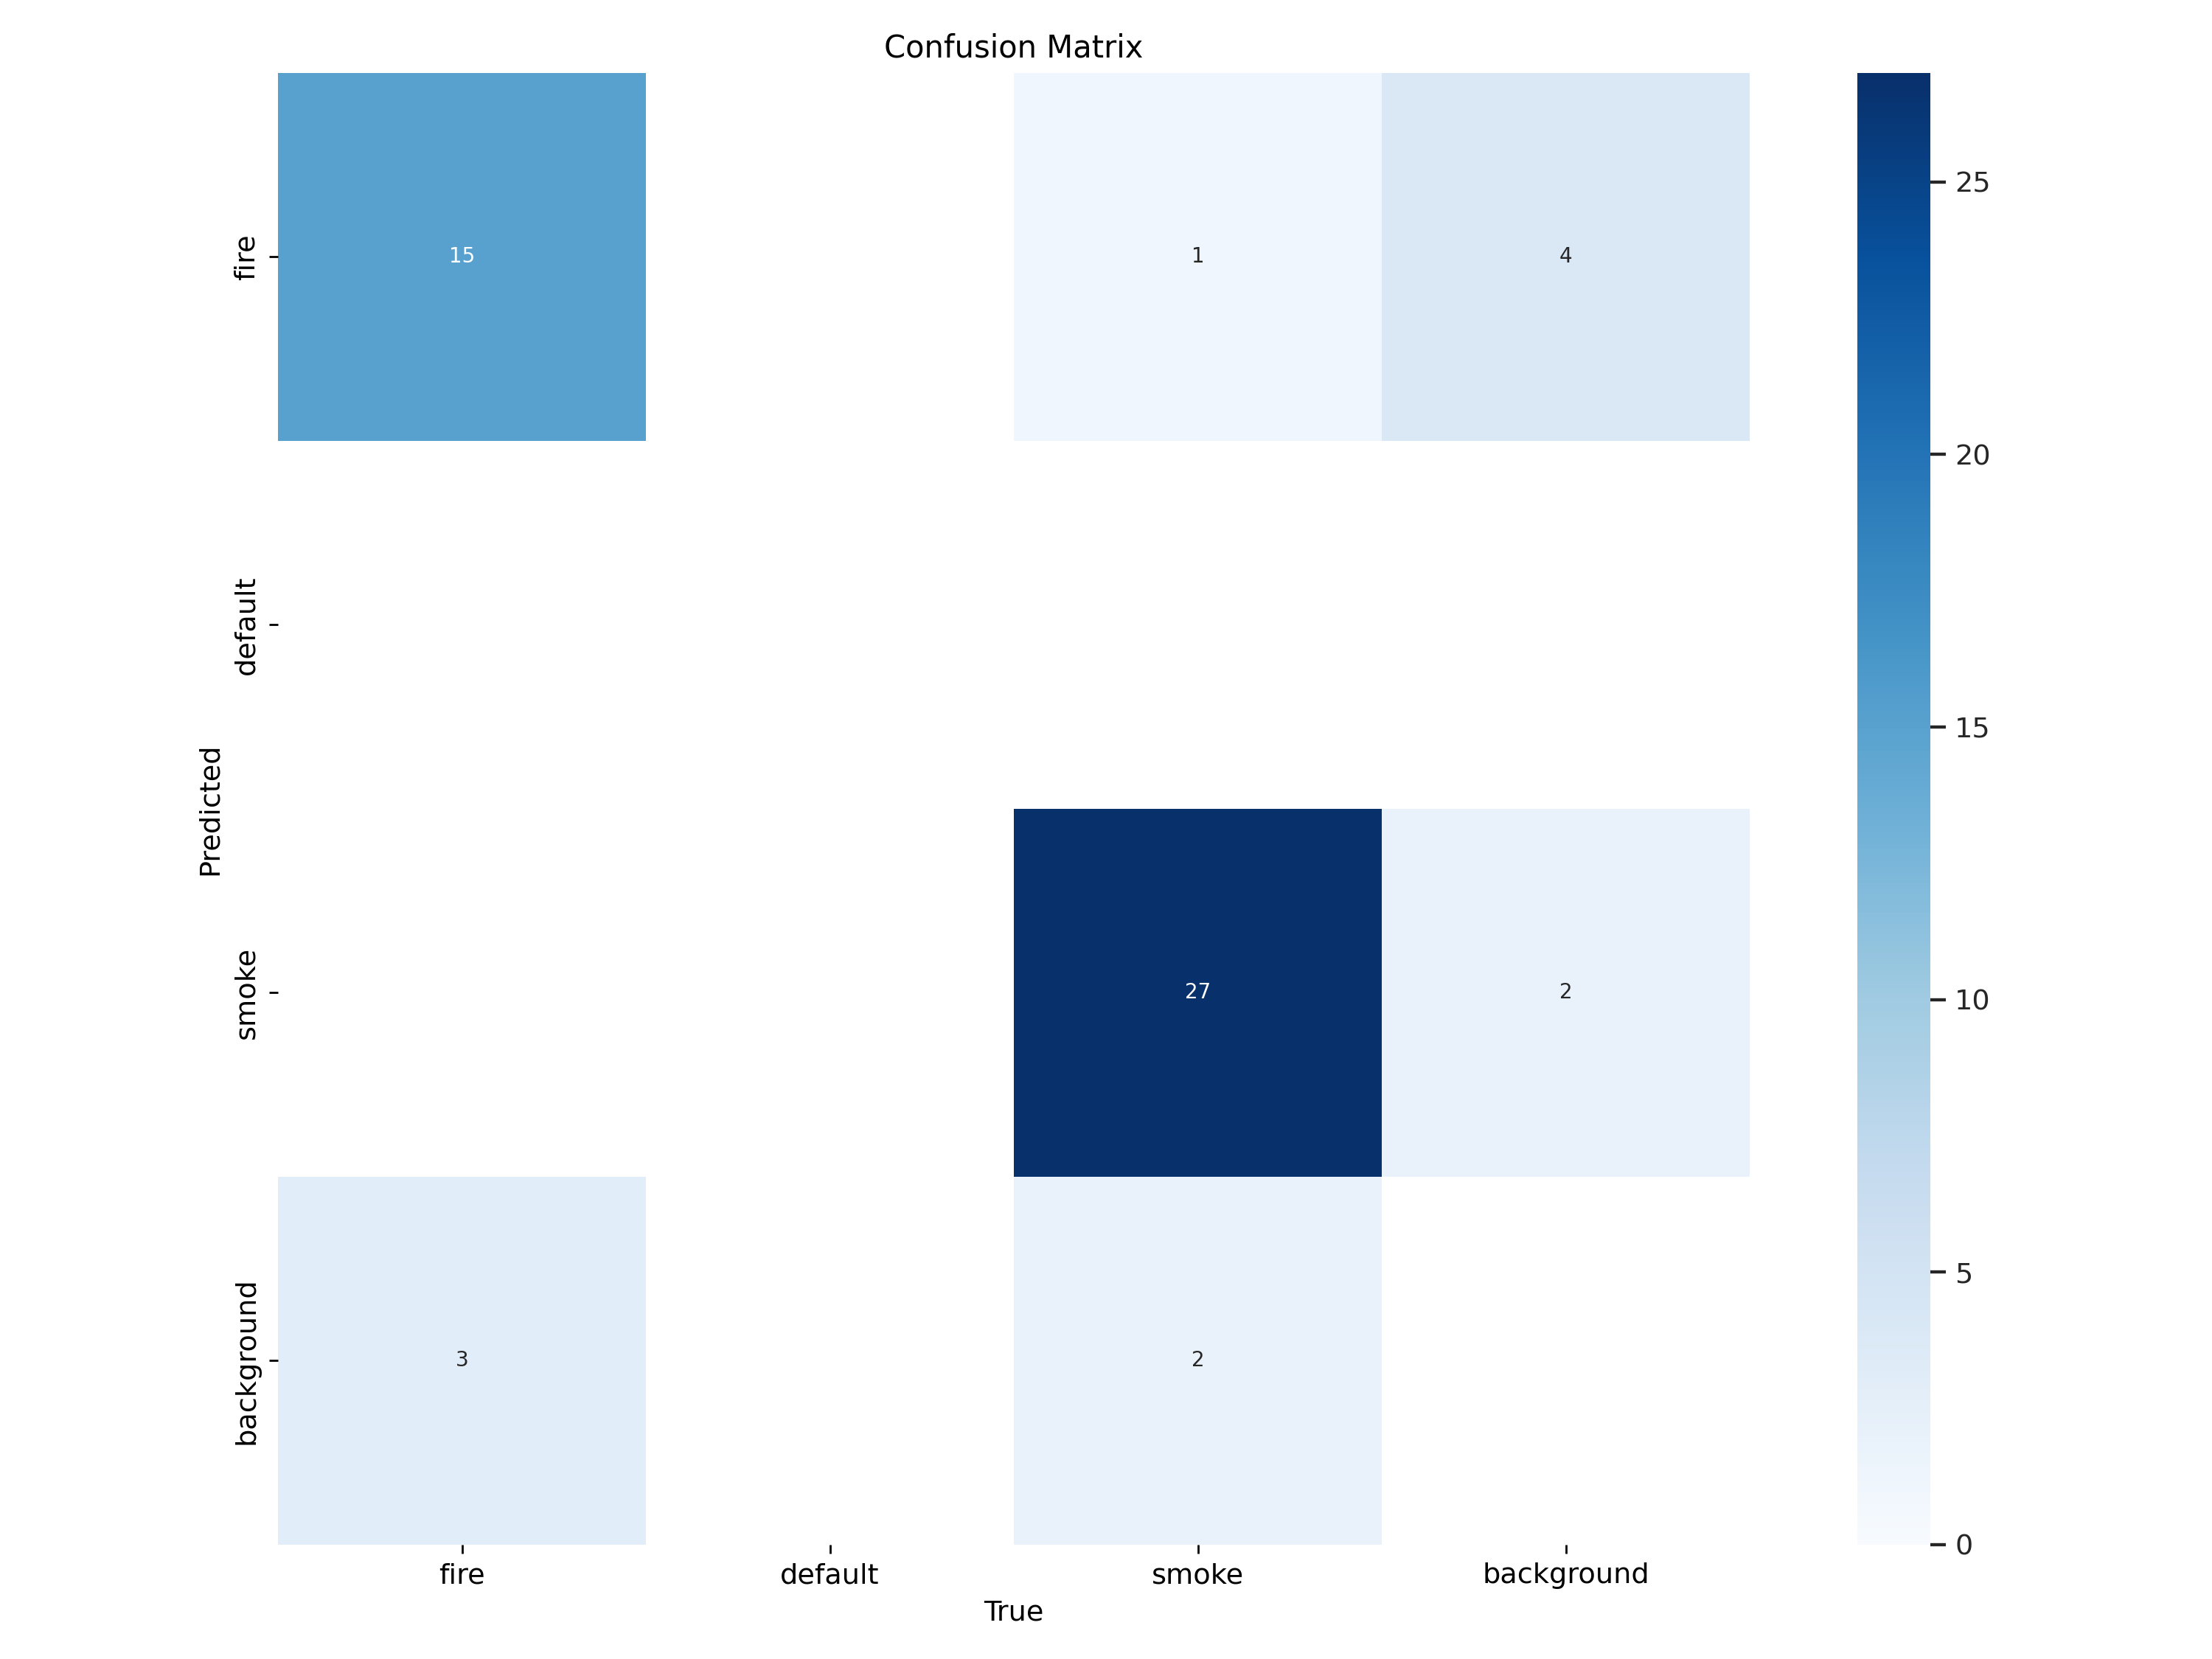

In [28]:
from IPython.display import display, Image
Image(filename='./runs/detect/train3/confusion_matrix.png', width=600)

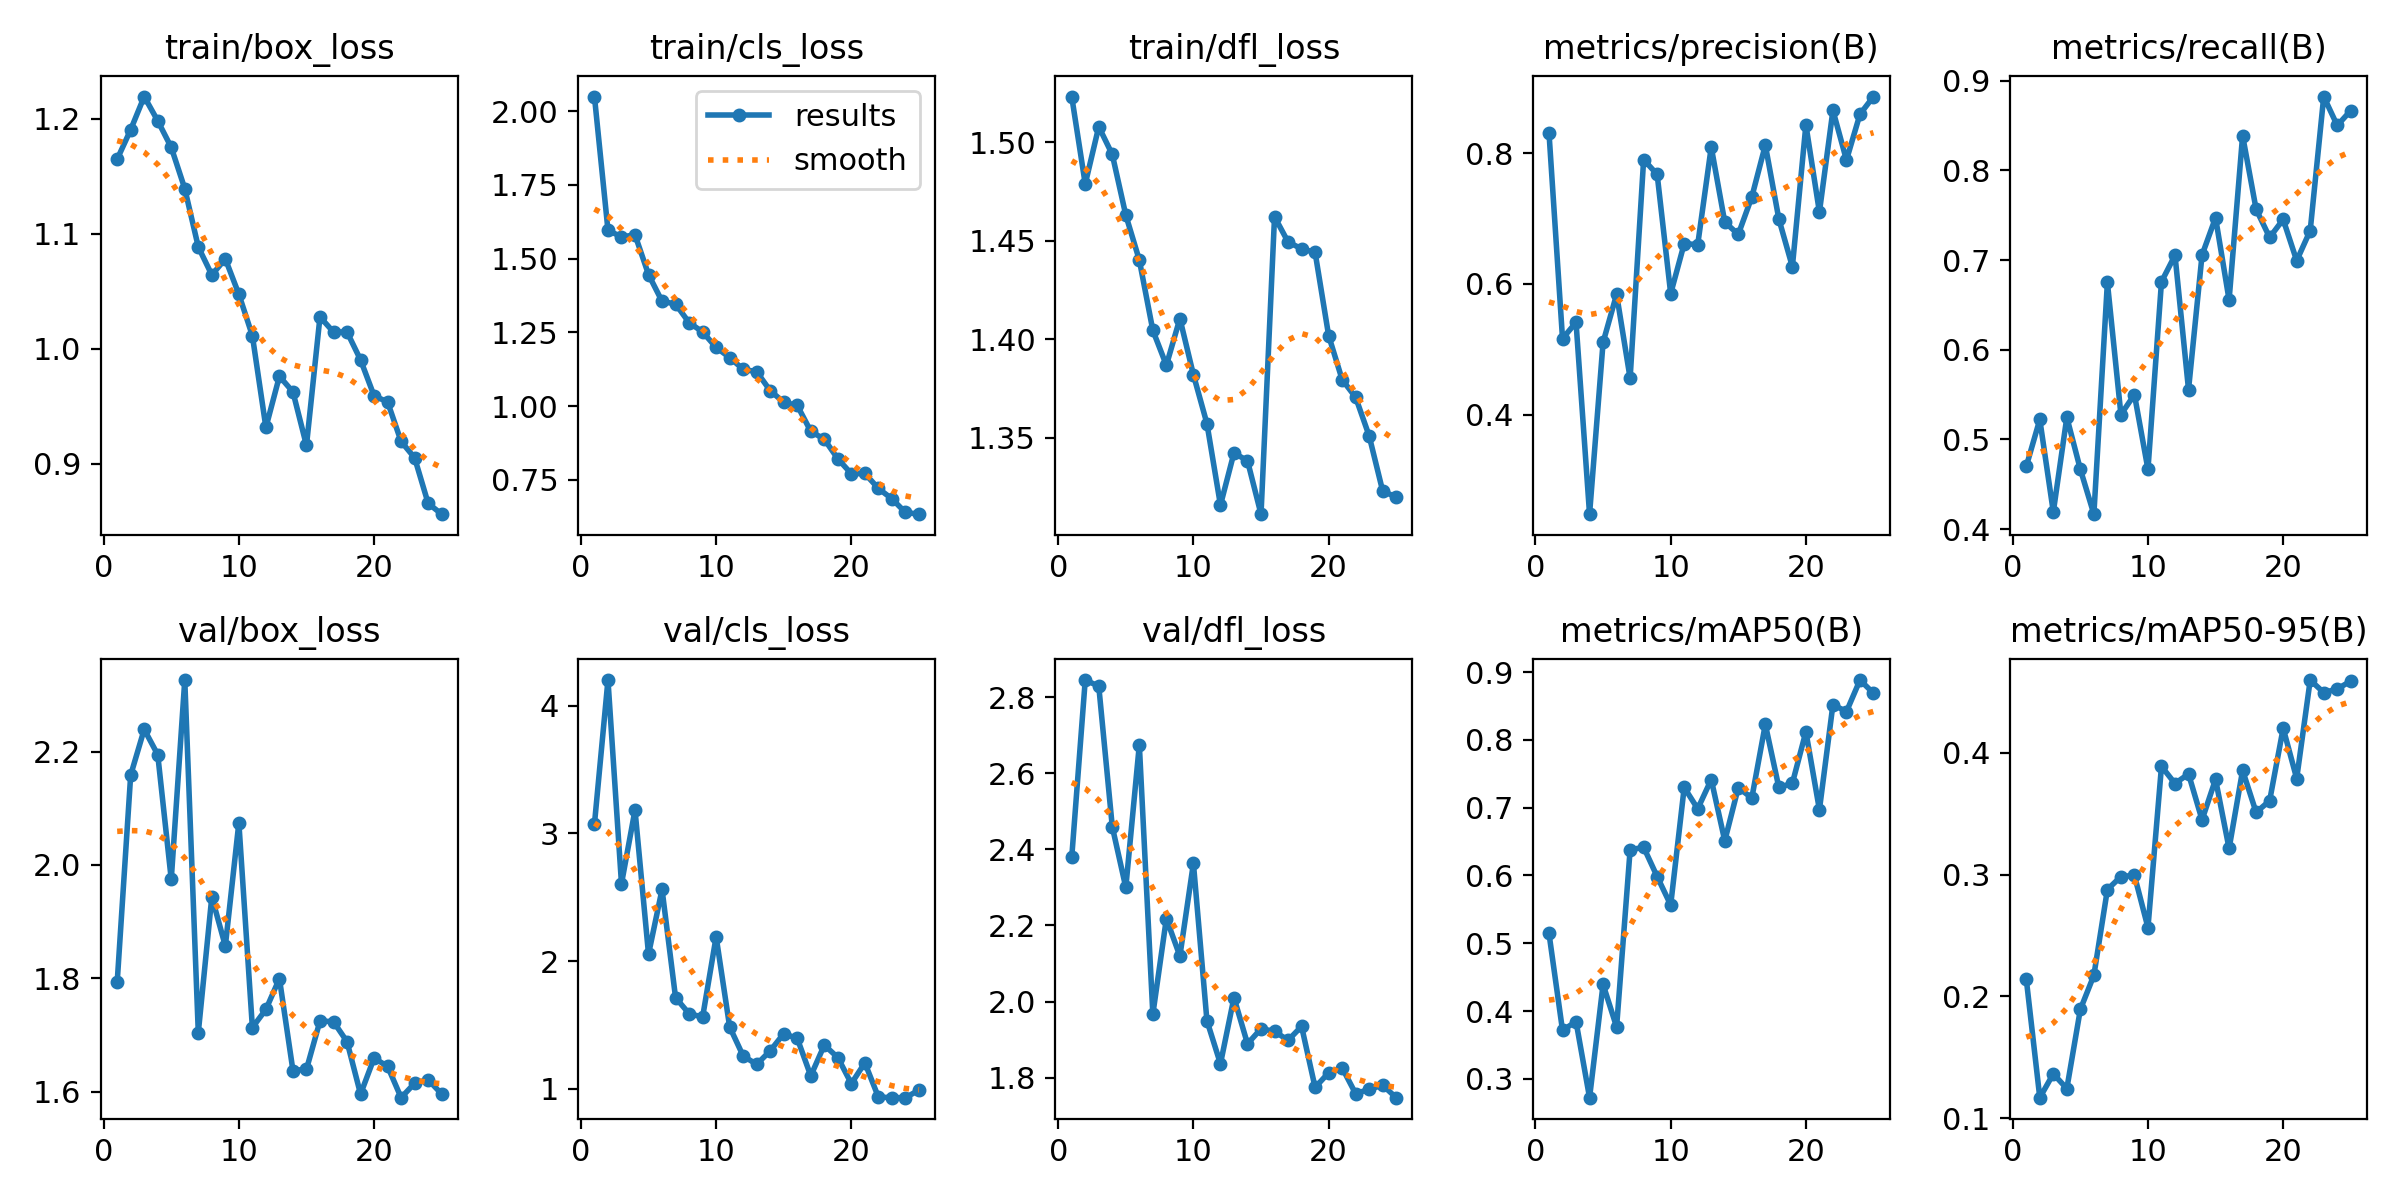

In [30]:
Image(filename='./runs/detect/train3/results.png', width=600)

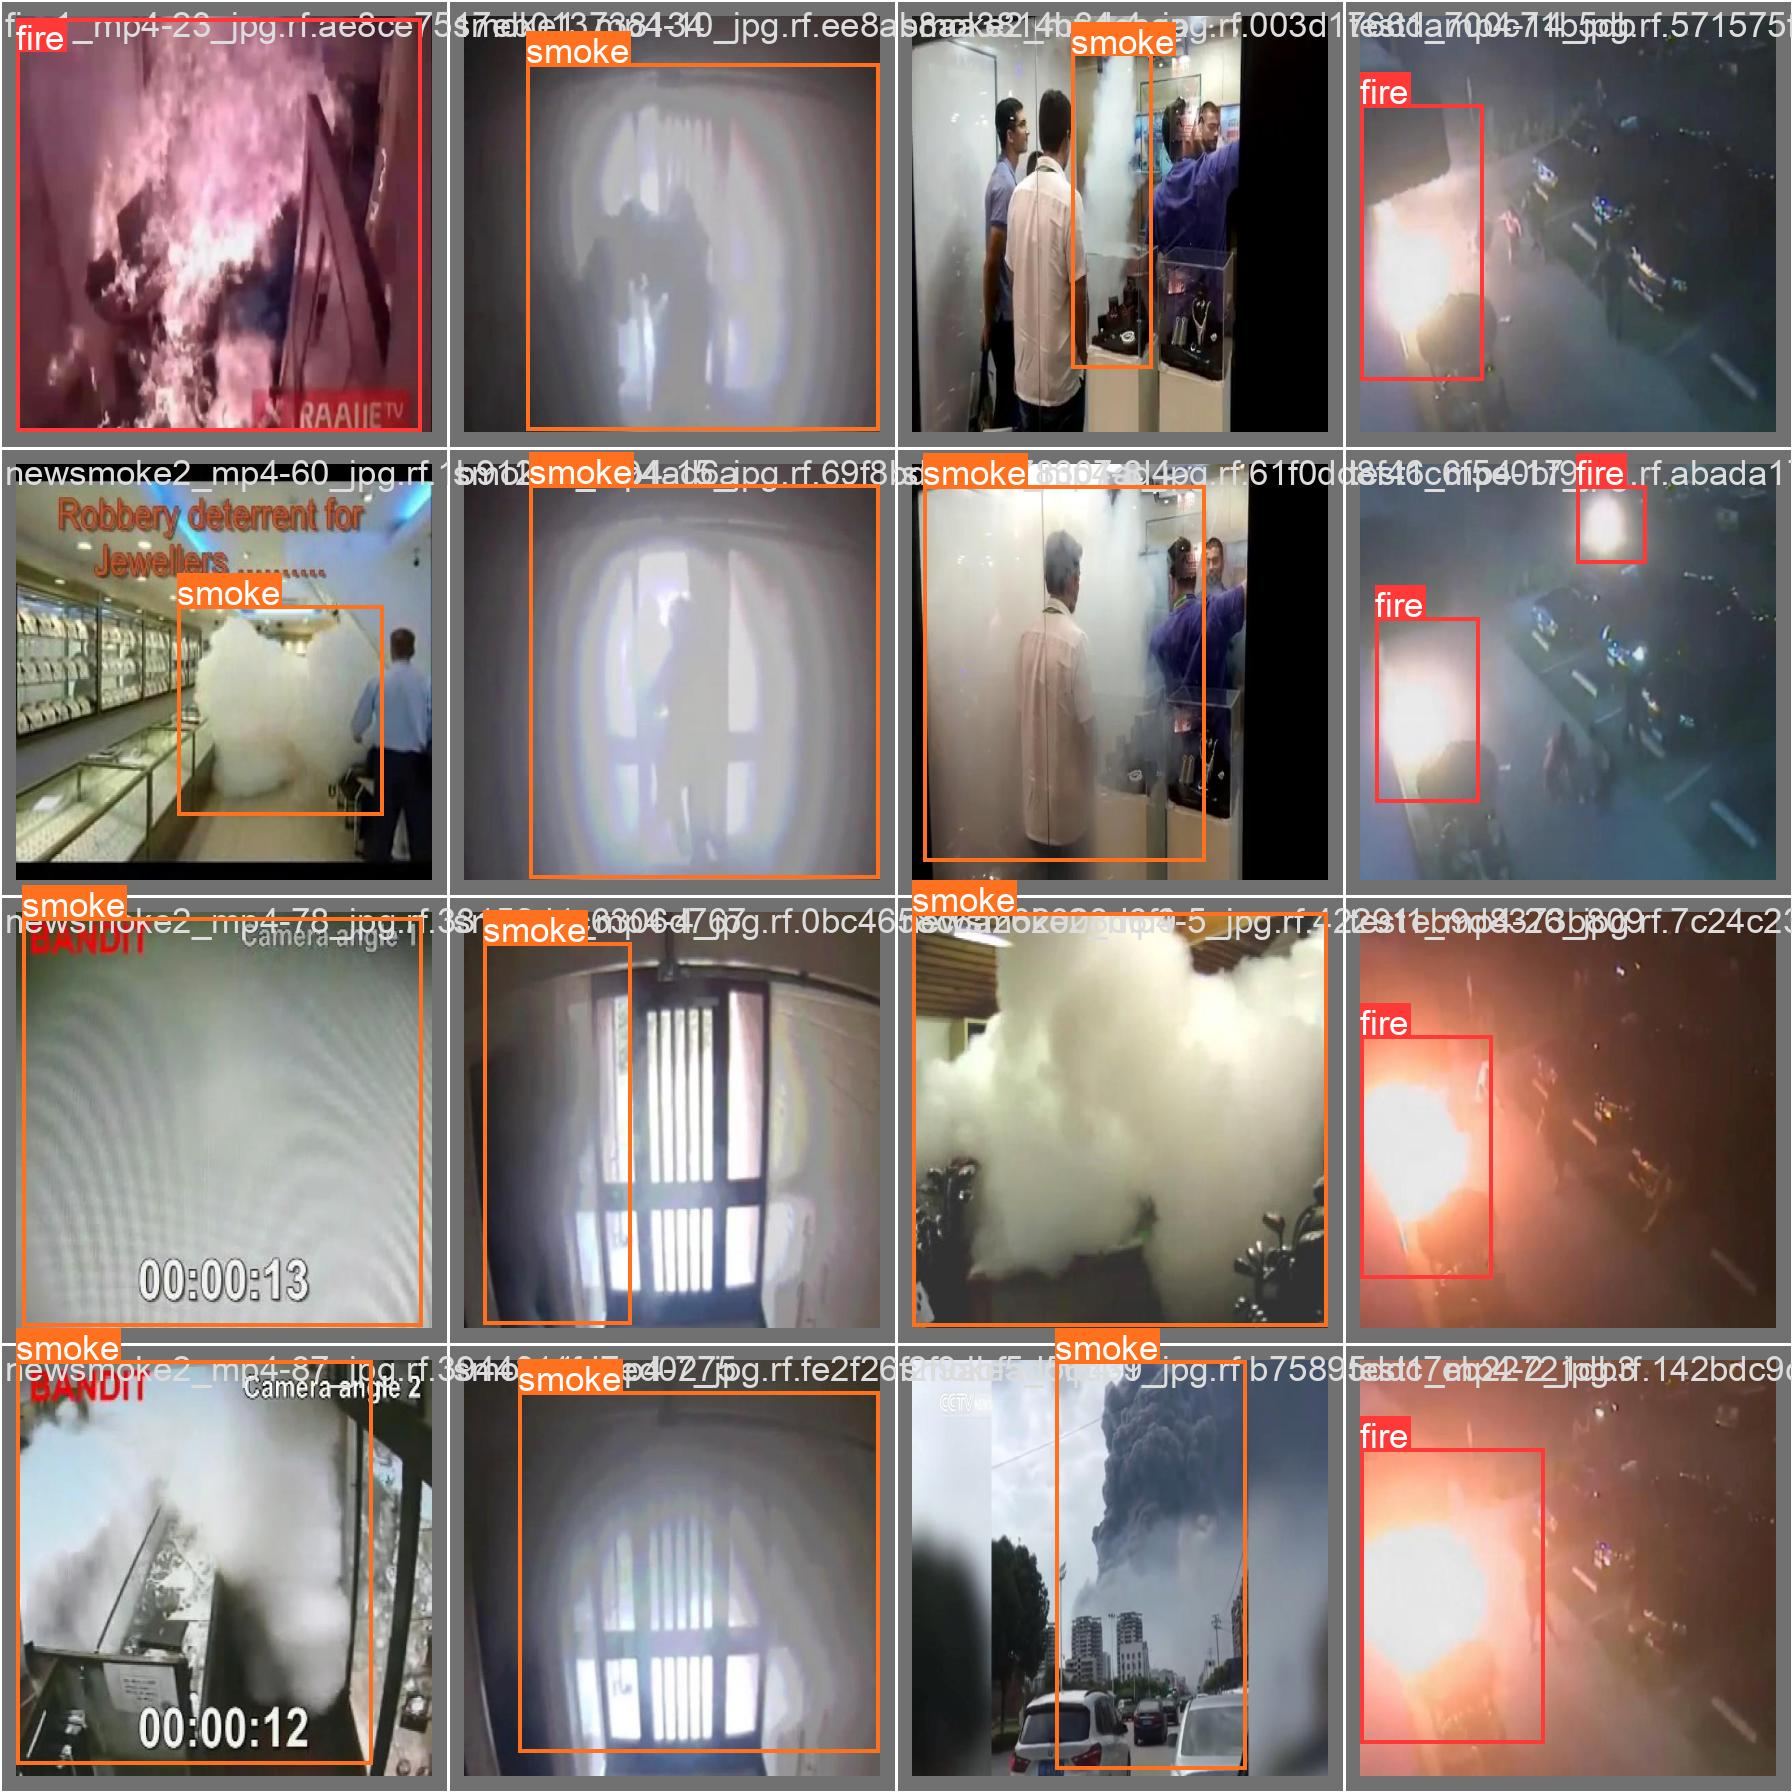

In [31]:
Image(filename='./runs/detect/train3/val_batch0_labels.jpg', width=600)

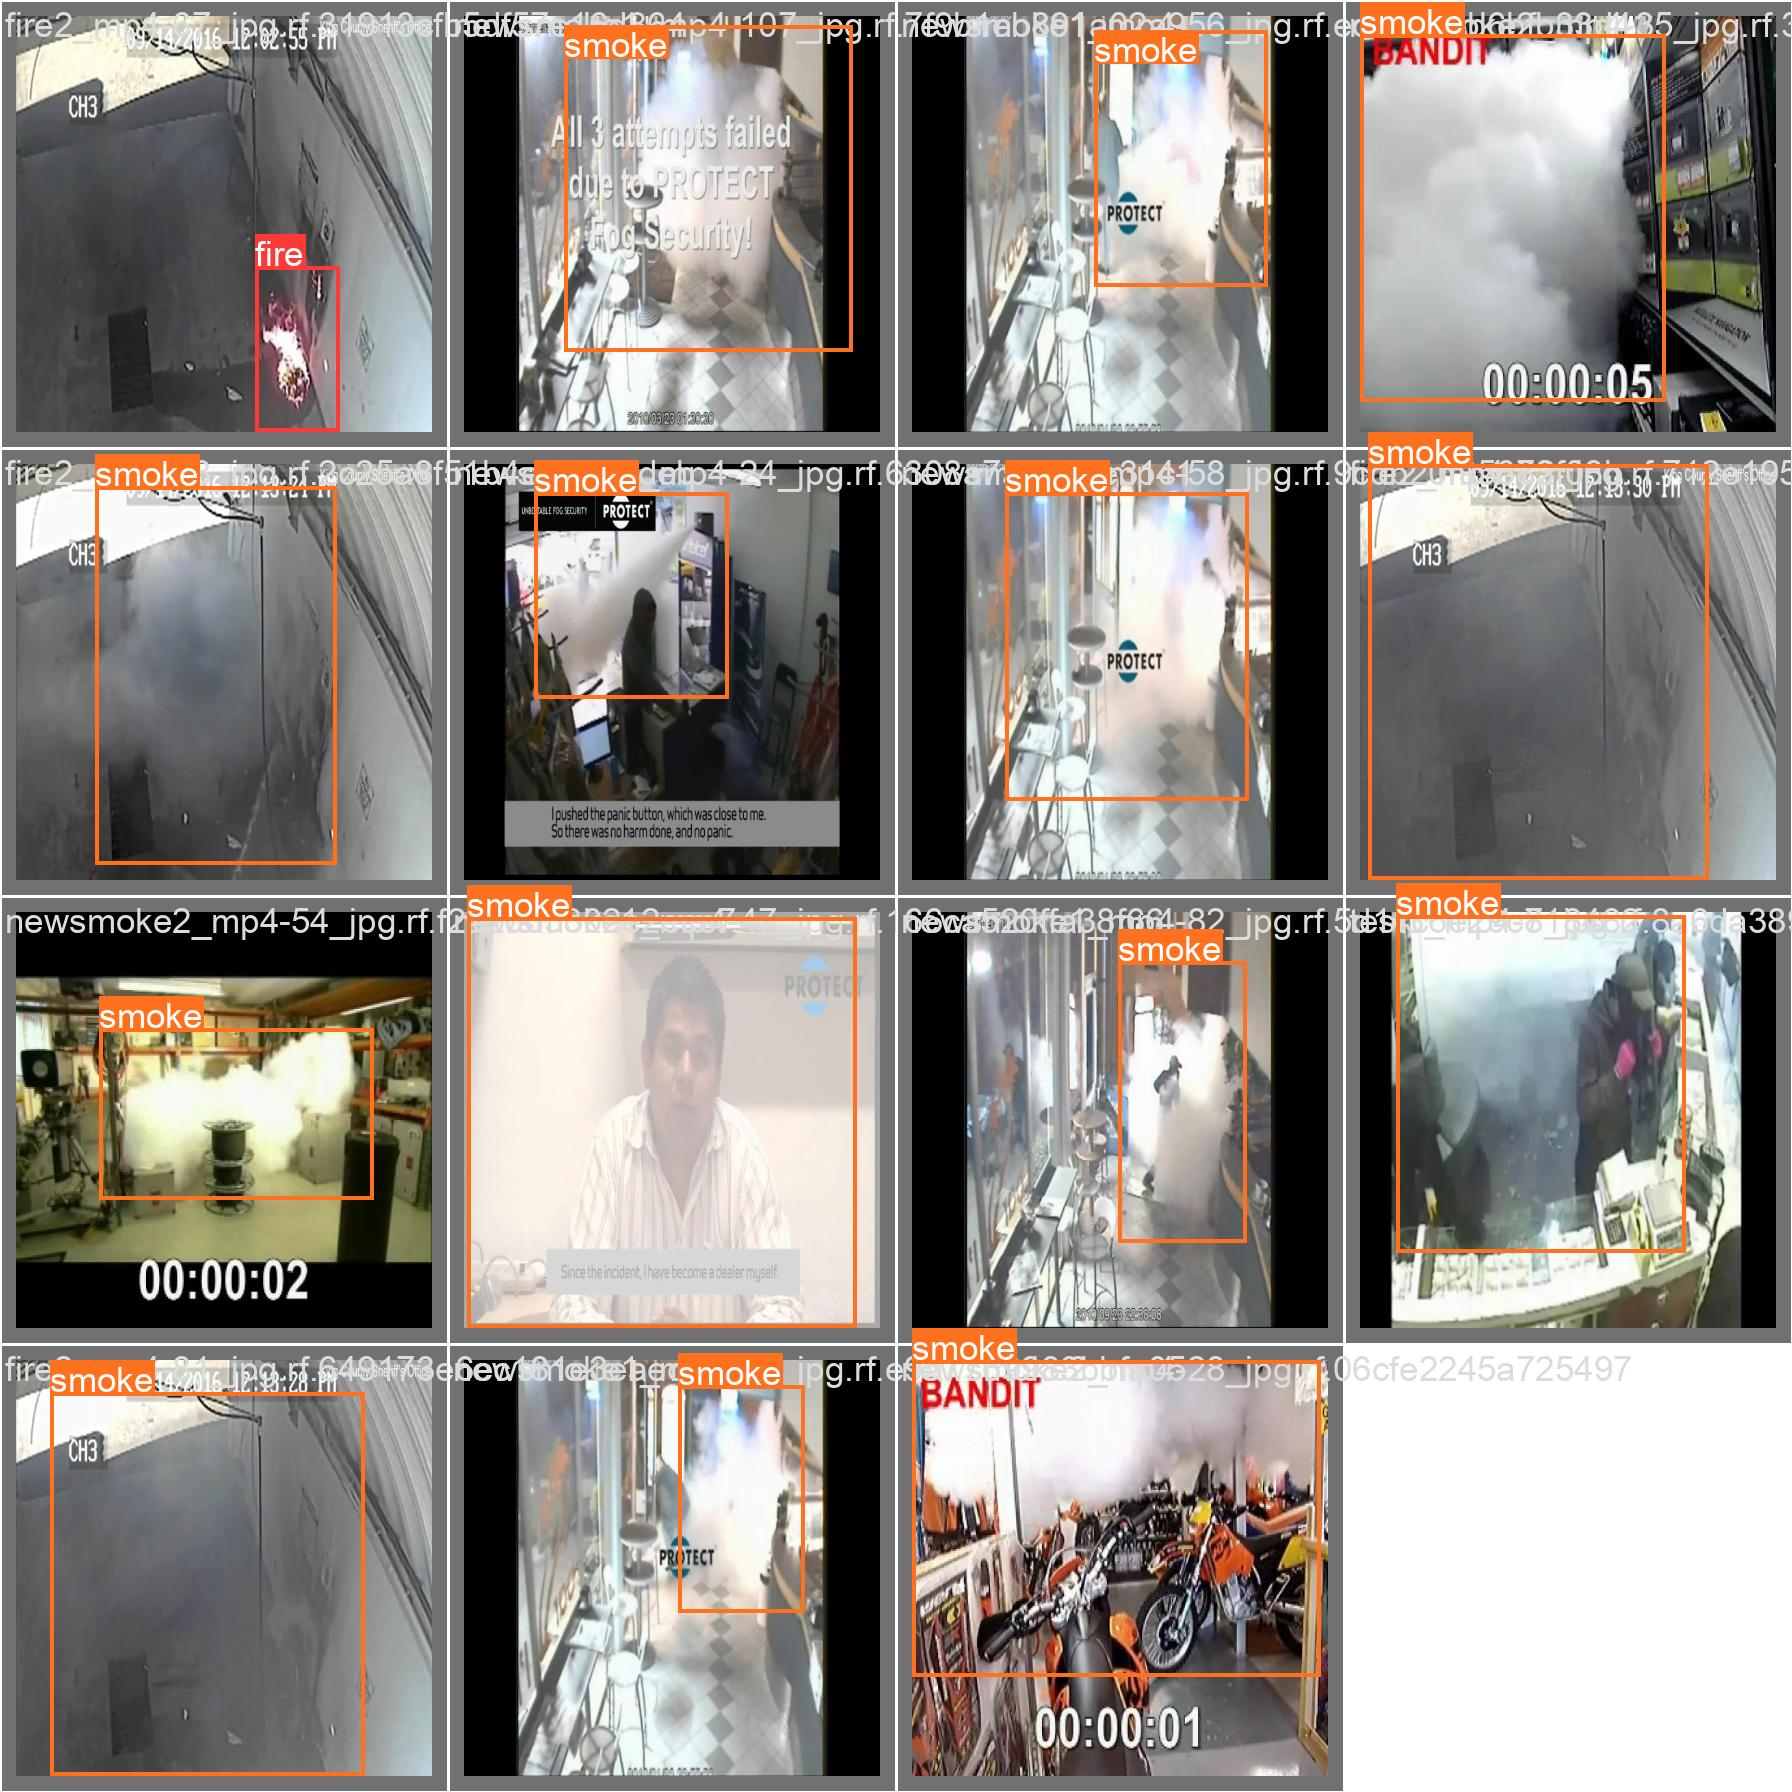

In [32]:
Image(filename='./runs/detect/train3/val_batch1_labels.jpg', width=600)

## Test the model with YOLOv8

In [33]:
!yolo task=detect mode=predict model="./runs/detect/train3/weights/best.pt" source="./runs/detect/train3/val_batch0_labels.jpg"

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/D-Fire-datasets/fire/runs/detect/train3/val_batch0_labels.jpg: 416x416 1 fire, 4 smokes, 12.2ms
Speed: 3.3ms preprocess, 12.2ms inference, 621.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict
